# 9.1 聚类

聚类：识别相似实例并将其分配给相似实例的集群或组。

聚类可以应用于：    
- 客户细分
- 数据分析
- 降维技术  
数据聚类以后，通常可以测量每个实例与每个集群的相似度（相似度是衡量一个实例和一个集群的相似程度）。然后可以将每个实例的特征向量$\mathbf{x}$替换为其集群的向量。如果有$k$个集群，则此向量为$k$维。此向量的维度通常比原始特征向量低得多，但它可以保留足够的信息可以进行进一步处理。  
- 异常检测（也称为离群检测）        
对所有集群具有低相似度的任何实例都可能是异常。例如，如果你已根据用户行为对网站用户进行了聚类，则可以检测到具有异常行为的用户，例如每秒的请求数量异常。异常检测在检测制造生产线中的缺陷或欺诈检测中特别有用。
- 半监督学习        
如果你只有几个标签，则可以执行聚类并将标签传播到同一集群中的所有实例。该技术可以大大增加可用于后续有监督学习算法的标签数量，从而提高其性能。
- 搜索引擎      
一些搜索引擎可让你搜索与参考图像相似的图像。要构建这样的系统，首先要对数据库中的所有图像应用聚类算法，相似的图像最终会出现在同一集群中。然后，当用户提供参考图像时，你需要做的就是使用训练好的聚类模型找到该图像的集群，然后可以简单地从该集群中返回所有的图像。
- 分割图像      
通过根据像素的颜色对像素进行聚类，然后用其聚类的平均颜色替换每个像素的颜色，可以显著减少图像中不同颜色的数量。**图像分割用于许多物体检测和跟踪系统中，因为它可以更轻松地检测每个物体的轮廓**。



分类 vs 聚类


In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
data.feature_names, data.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [4]:
X = data.data
y = data.target
X.shape, y.shape

((150, 4), (150,))

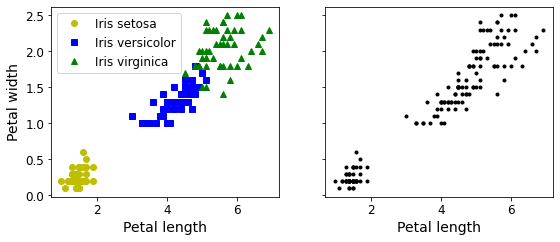

In [5]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)



plt.show()

使用一个高斯混合模型，利用petal length+width, sepal length+width, 也是可以很好的将iris数据分为三类的

In [6]:
from sklearn.mixture import GaussianMixture

In [7]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

接下来将每个cluster映射到每个class上，使用`scipy.stats.mode()`可以方便的实现

In [8]:
from scipy import stats
mapping = {}

for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id
mapping

{2: 0, 0: 1, 1: 2}

In [9]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

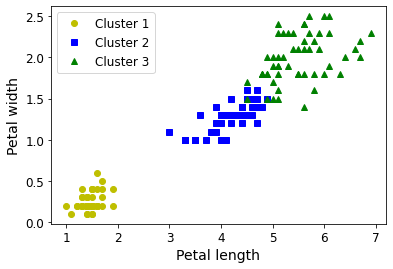

In [10]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [11]:
np.sum(y_pred==y)

145

In [12]:

np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

## 9.1.1 K-Means
它是由贝尔实验室的Stuart Lloyd在1957年提出的，用于脉冲编码调制，但直到1982[1]年才对外发布。1965年，Edward W.Forgy发布了相同的算法，因此K-Means有时被称为Lloyd–Forgy

In [13]:
from sklearn.datasets import make_blobs

In [14]:
blob_centers = np.array([
    [0.2, 2.3],
    [-1.5 ,  2.3],
    [-2.8,  1.8],
    [-2.8,  2.8],
    [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])


In [15]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,cluster_std=blob_std, random_state=7)

In [16]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

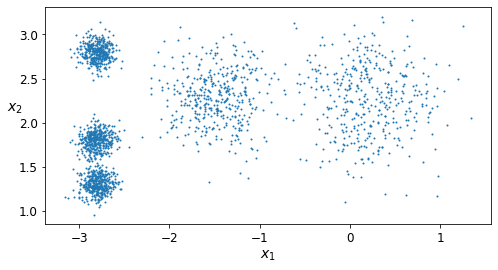

In [17]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()